In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#we will use only one numerical feature
#df = df[['TV', 'Radio', 'Newspaper', 'Sales']]

In [5]:
df.shape

(200, 4)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# What is the relationship between each feature and the target variable

In [7]:
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-m9fvcp3x because the default path (/home/gevorg/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Text(18.0, 0.5, 'Sales')

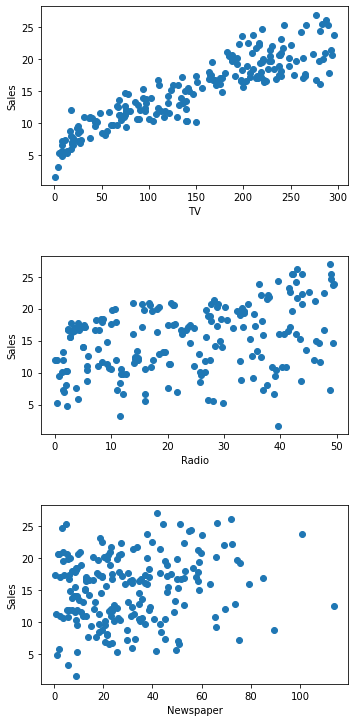

In [8]:
fig, axs = plt.subplots(3, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df['TV'], df['Sales'])
axs[0].set_xlabel('TV')
axs[0].set_ylabel('Sales')

axs[1].scatter(df['Radio'], df['Sales'])
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Sales')

axs[2].scatter(df['Newspaper'], df['Sales'])
axs[2].set_xlabel('Newspaper')
axs[2].set_ylabel('Sales')


```
Is there a relationship between ads and sales?
How strong is that relationship?
Which ad types contribute to sales?
```

# Splitting data into training and test sets

```

Training set - the portion of data used for training the algorithm, in our case determining the coefficients of the line

Test set - data that the algorithm hasn't seen yet, used to evaluate the model

```

In [9]:
df = df[['TV', 'Sales']]

In [10]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [11]:
df.columns.difference(['Sales'])

Index(['TV'], dtype='object')

In [12]:
df[['TV']]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [13]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Sales'])],df['Sales'], test_size=0.2, random_state=42)

In [14]:
len(df)

200

In [15]:
len(xTrain), len(xTest)

(160, 40)

In [16]:
xTrain.head()

,TV
79,116.0
197,177.0
38,43.1
24,62.3
122,224.0


In [17]:
xTest.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [18]:
yTrain.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)



LinearRegression()

In [20]:
regr.coef_, regr.intercept_  #Sales = 7.007 + 0.055*TV

(array([0.05548294]), 7.007108428241857)

In [21]:
# Make predictions using the testing set
y_pred = regr.predict(xTest)

In [22]:
y_pred

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [23]:
np.array(yTest)

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 16.5, 16.1, 11. ,
        8.7, 16.9,  5.3, 10.3, 16.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2, 11.3,  8.1, 21.7, 13.4, 10.6,  5.7, 15.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

<AxesSubplot:>

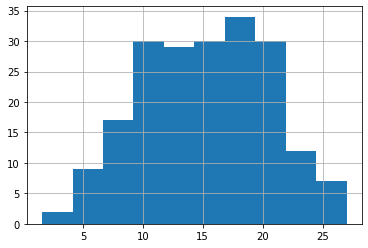

In [24]:
df['Sales'].hist()

Coefficients: 
 [0.05548294]
Mean absolute error: 1.95
Mean squared error: 6.10
Root mean squared error: 2.47
R-squared: 0.80


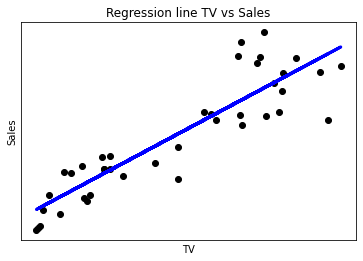

In [25]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))



# Plot outputs
plt.scatter(xTest, yTest,  color='black')
plt.plot(xTest, y_pred, color='blue', linewidth=3)

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regression line TV vs Sales')

plt.xticks(())
plt.yticks(())

plt.show()



```
* A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales
* Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 
```

In [26]:
y_train_pred = regr.predict(xTrain)
y_train_pred

array([13.44312992, 16.8275895 ,  9.39842331, 10.46369584, 19.43528787,
        9.12655689, 10.92420427, 15.17974607, 12.81062436, 11.24045705,
       11.34587464, 16.35043619,  7.48981004,  7.43987539, 11.24600534,
       14.18660137, 11.07955651, 23.08051729,  8.09457413, 17.97053815,
       22.78090939, 17.26590476, 13.2711328 ,  8.32760249, 23.13600023,
        8.08347754, 23.29690077,  8.04463948, 14.4584678 ,  8.42747179,
       12.577596  , 11.45684053, 17.46009506, 16.8275895 , 13.98131448,
       18.63633348, 14.93562112, 17.26590476, 19.34651516, 20.41733598,
        7.96141506, 13.69280317, 11.9839285 , 17.60989901, 11.1960707 ,
       17.7264132 , 11.76199672, 21.81550616,  9.19868471, 21.50480168,
        7.73948329, 17.75415467, 23.45225301, 21.74337834, 18.91929649,
       15.31290513, 14.31421214, 10.1973777 , 20.32856327, 14.84684841,
       17.03842469, 12.40005058, 19.24109757, 14.79136546, 21.17745231,
       12.34456763, 10.67453102, 20.28417691, 16.75546168, 20.32

In [27]:
np.array(yTrain)

array([11. , 14.8, 10.1,  9.7, 16.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6,
       16.7,  7.2,  6.6,  9.4, 11. , 10.9, 25.4,  7.6, 16.7, 20. , 20.5,
       11.9,  9.2, 17.8,  6.6, 20.7,  6.7, 14. ,  9.5, 10.7, 11.9, 19.9,
       17.1, 15.9, 20.9, 15. , 20.7, 16.7, 21.8, 12. , 14.2, 10.6, 17.3,
       11.9, 20.2, 13.3, 25.4, 10.8, 24.2,  5.6, 19.2, 23.8, 17.4, 17.4,
       17.3, 12.9, 11.8, 20.9, 15.5, 17.9, 13.2, 20.1, 10.3, 19.8, 12.3,
       12.6, 20.7, 17.1, 18.2,  8. , 22.1, 25.5, 16. , 18.3, 15.2, 16. ,
        8.5, 18. , 18.9, 16.6,  5.3,  3.2, 15.3, 17. , 20.5, 17.6, 25.4,
       17.3, 21.5, 17.1, 23.2, 11.5, 20.6, 17.9,  9.6, 16.5, 15. , 21.2,
       19.6, 15.5, 16.8, 22.6,  9.7, 11.8, 11.9, 13.2, 18.4,  7.3, 13.6,
       20.2, 17.2, 16.7,  4.8, 13.7, 18.4, 17.5, 17.7, 24.4,  8.8, 27. ,
       10.8, 17.2, 26.2, 14. , 20.2, 12. , 16.4, 14. , 23.8, 19.8, 12.9,
       17.5, 13.2, 16.4,  5.9,  9.7, 14.7, 10.1, 19.6, 10.4, 22.6, 10.1,
        1.6, 11.6, 19.7, 17.2, 12.2, 16. , 17. ,  7

Mean absolute error: 1.80
Mean squared error: 5.00
Root mean squared error: 2.24
R-squared: 0.81


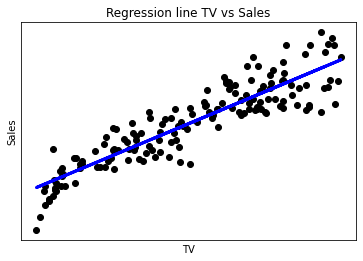

In [28]:
y_train_pred = regr.predict(xTrain)

# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTrain, y_train_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTrain, y_train_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTrain, y_train_pred)))

print('R-squared: %.2f'
      % r2_score(yTrain, y_train_pred))



# Plot outputs
plt.scatter(xTrain, yTrain,  color='black')
plt.plot(xTrain, y_train_pred, color='blue', linewidth=3)

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regression line TV vs Sales')

plt.xticks(())
plt.yticks(())

plt.show()




# Add more features (r square increases)

In [29]:
df = pd.read_csv('advertising.csv')

In [30]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [31]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Sales'])],df['Sales'], test_size=0.2, random_state=42)

In [32]:
xTrain.head()

,Newspaper,Radio,TV
79,23.1,7.7,116.0
197,6.4,9.3,177.0
38,35.1,26.7,43.1
24,18.3,12.6,62.3
122,15.6,2.4,224.0


In [33]:
yTest.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)

# Make predictions using the testing set
y_pred = regr.predict(xTest)

In [35]:
regr.coef_, regr.intercept_

(array([0.00433665, 0.10094536, 0.05450927]), 4.7141264022141325)

In [36]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

Coefficients: 
 [0.00433665 0.10094536 0.05450927]
Mean absolute error: 1.27
Mean squared error: 2.91
Root mean squared error: 1.71
R-squared: 0.91


# Try only on TV and Radio

In [37]:
df = pd.read_csv('advertising.csv')

In [38]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [39]:
df = df[['TV','Radio', 'Sales']]

In [40]:
df.head()

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9


In [41]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Sales'])],df['Sales'], test_size=0.2, random_state=42)

In [42]:
xTrain.head()

,Radio,TV
79,7.7,116.0
197,9.3,177.0
38,26.7,43.1
24,12.6,62.3
122,2.4,224.0


In [43]:
yTest.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)

# Make predictions using the testing set
y_pred = regr.predict(xTest)

In [45]:
regr.coef_, regr.intercept_

(array([0.10325764, 0.05450736]), 4.791381661776029)

In [46]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

Coefficients: 
 [0.10325764 0.05450736]
Mean absolute error: 1.27
Mean squared error: 2.85
Root mean squared error: 1.69
R-squared: 0.91


In [47]:
df = pd.read_csv('advertising.csv')

In [48]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# K- Fold Cross Validation

In [49]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [50]:
y = df.Sales
del df["Sales"]
X = df
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [51]:
scores = []
best_svr = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  

/home/gevorg/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [52]:
scores = np.mean(scores)

In [53]:
scores

0.8915173447734139